In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
df_DA_HU = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Hungary')].copy()
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_HU = df_DA_HU.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

<Axes: >

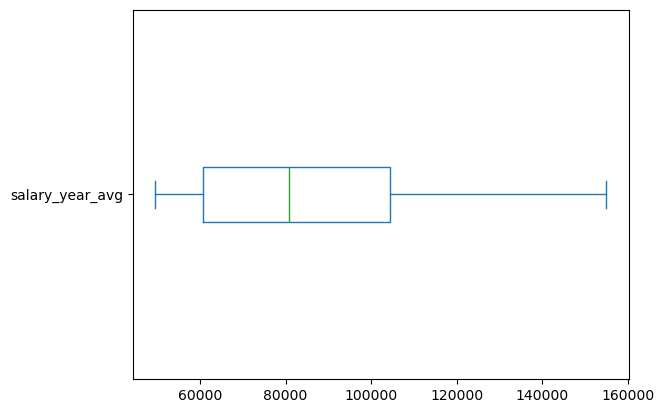

In [10]:
df_DA_HU['salary_year_avg'].plot(kind='box', vert=False)

<Axes: >

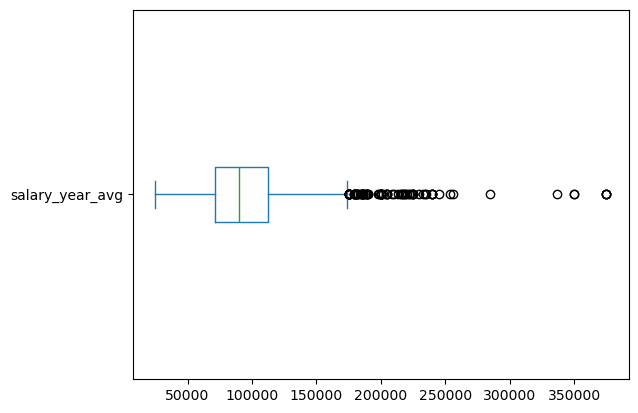

In [11]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

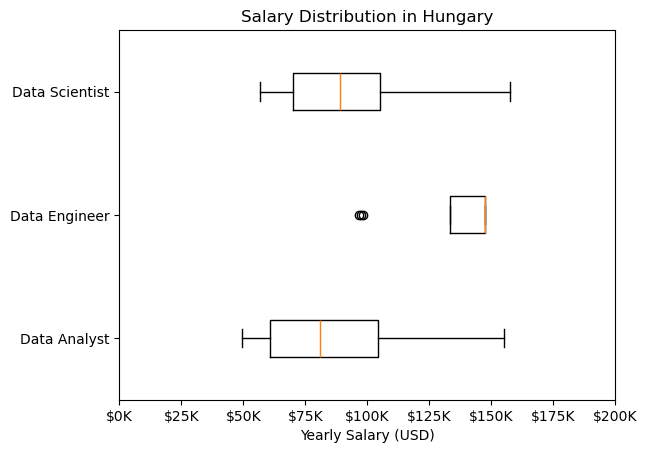

In [29]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_HU = df_HU = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Hungary')].copy()
df_HU = df_HU.dropna(subset=['salary_year_avg'])

job_list = [df_HU[df_HU['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in Hungary')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 200000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

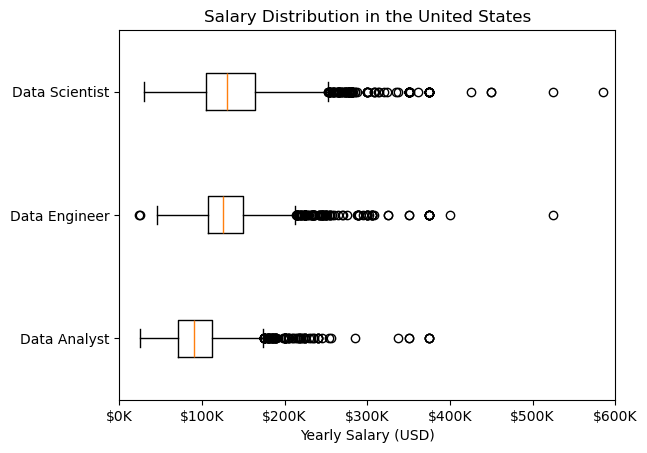

In [26]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()